<a href="https://colab.research.google.com/github/Eoli-an/Exam-topic-prediction/blob/main/WordFrequency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Files

In [95]:
import os
import nltk
from textblob import TextBlob
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')
import matplotlib.pyplot as plt
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\simon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\simon\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\simon\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [2]:
def read_text_file(file_path):
    with open(file_path, 'r') as f:
        return(f.read())

In [102]:
lectures = [read_text_file(os.path.join("Transcribes", file)) for file in os.listdir("Transcribes")]

In [4]:
a = [file for file in os.listdir("Transcribes")]
#a.sort()
a

['Lecture_02.txt',
 'Lecture_03.txt',
 'Lecture_04.txt',
 'Lecture_05.txt',
 'Lecture_06.txt',
 'Lecture_07.txt',
 'Lecture_08.txt',
 'Lecture_09.txt',
 'Lecture_10.txt',
 'Lecture_11.txt',
 'Lecture_12.txt']

In [88]:
['Lecture_02.txt',
 'Lecture_03.txt',
 'Lecture_04.txt',
 'Lecture_05.txt',
 'Lecture_06.txt',
 'Lecture_07.txt',
 'Lecture_08.txt',
 'Lecture_09.txt',
 'Lecture_10.txt',
 'Lecture_11.txt',
 'Lecture_12.txt']

['Lecture_02.txt',
 'Lecture_03.txt',
 'Lecture_04.txt',
 'Lecture_05.txt',
 'Lecture_06.txt',
 'Lecture_07.txt',
 'Lecture_08.txt',
 'Lecture_09.txt',
 'Lecture_10.txt',
 'Lecture_11.txt',
 'Lecture_12.txt']

# Exploration

In [6]:
# word frequency
tokens = nltk.word_tokenize(lectures[0])
freq = nltk.FreqDist(tokens)
freq = sorted(freq.items(), key=lambda item: item[1])
freq[-100:]


[('right', 19),
 ('going', 20),
 ('function', 20),
 ('all', 20),
 ('now', 20),
 ('very', 21),
 ('mean', 21),
 ('know', 21),
 ('equal', 21),
 ('example', 21),
 ('random', 21),
 ('density', 21),
 ('way', 22),
 ('bias', 22),
 ('variance', 22),
 ('Yes', 23),
 ('case', 23),
 ('y', 24),
 ('population', 24),
 ('get', 24),
 ('they', 24),
 ('number', 25),
 ('Yeah', 25),
 ('see', 26),
 ('your', 26),
 ('experiment', 26),
 ('at', 27),
 ('want', 27),
 ('also', 28),
 ('first', 28),
 ("n't", 28),
 ('sample', 30),
 ('some', 31),
 ('two', 31),
 ('how', 32),
 ('samples', 32),
 ('actually', 32),
 ('probability', 32),
 ('data', 33),
 ('estimator', 33),
 ('think', 35),
 ('maybe', 35),
 ('which', 35),
 ('But', 35),
 ('distribution', 35),
 ('more', 35),
 ('basically', 36),
 ('people', 38),
 ('expectation', 38),
 ('about', 41),
 ('would', 42),
 ('not', 43),
 ('sampling', 43),
 ('an', 44),
 ('with', 44),
 ('or', 45),
 ('but', 45),
 ('by', 45),
 ('as', 47),
 ("'re", 47),
 ('here', 49),
 ('one', 50),
 ('on', 53)

In [7]:
# word frequency of nouns
# TODO rather restrictive, i.e. regression and logistic regression are two different words
blob = TextBlob(lectures[0])
freq = nltk.FreqDist(blob.noun_phrases)
freq = sorted(freq.items(), key=lambda item: item[1])



In [8]:
# TODO does not rlly work
is_noun = lambda pos: pos[:2] == 'NN'
tokenized = nltk.word_tokenize(lectures[0])
freq = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
freq = nltk.FreqDist(tokens)
freq = sorted(freq.items(), key=lambda item: item[1])
freq[-20:]

[('be', 106),
 ('for', 110),
 ('can', 112),
 ('I', 117),
 ('And', 136),
 ('in', 140),
 ('it', 141),
 ('and', 150),
 ('So', 199),
 ('that', 204),
 ('we', 209),
 ('a', 213),
 ('to', 248),
 ('is', 260),
 ('this', 269),
 ('of', 287),
 ('you', 309),
 ('.', 585),
 ('the', 593),
 (',', 693)]

# Tokens with overall highest frequency

In [9]:
joined = ""
for l in lectures:
  joined += " " + l
blob = TextBlob(joined)
freq = nltk.FreqDist(blob.noun_phrases)
freq = sorted(freq.items(), key=lambda item: item[1])
freq[-20:]

[("'s kind", 32),
 ('maximum likelihood estimate', 32),
 ('null hypothesis', 33),
 ('python', 34),
 ('machine learning', 35),
 ('log likelihood', 35),
 ('logistic regression', 35),
 ('ai', 40),
 ('fisher', 42),
 ('oh', 47),
 ('germany', 52),
 ('linear regression', 52),
 ('bayesian', 60),
 ("ca n't", 72),
 ('well', 78),
 ('yeah', 79),
 ('pca', 85),
 ('right', 125),
 ('gaussian', 153),
 ('okay', 433)]

In [10]:
# absolute occurances of sensible noun phrases of top 50
# 9844 noun phrases
# (trivia - he said okay 434 times)
result_all = {"gaussian":153,"pca":85,"bayesian":60,"linear regression":52,"fisher":42,"ai":40,"machine learning":35,"logistic regression":35,"log likelihood":35,"null hypothesis":33,"maximum likelihood estimate":32,
 "iid":31,"standard deviation":28,"linear function":28,"principal component":21,"random number":19,"high dimensional space":19,"dimensional space":19,"laplace":18,"p value":17,
 "control group":17, "monte carlo":16,"information matrix":15,"linear model":15}


# High frequency tokens per lecture

In [ ]:
#Lecture 07
# 870 noun phrases in total
[('binary distribution', 3),
 ('regression function', 3),
 ('% probability', 3),
 ('negative log likelihood', 3),
 ('log probability', 3),
 ('odds ratios', 3),
 ('poisson', 3),
 ('decision surface', 4),
 ('binary outcomes', 4),
 ('bernoulli', 4),
 ('average weight', 4),
 ('linear regression model', 4),
 ('causal link', 5),
 ('exponential family', 5),
 ('maximum likelihood estimation', 6),
 ('bayesian', 6),
 ('link function', 6),
 ('linear model', 8),
 ('omega', 9),
 ('regression model', 10),
 ('nonlinear function', 10),
 ('log likelihood', 11),
 ('linear regression', 17),
 ('linear function', 19),
 ('logistic regression', 28),
 ('gaussian', 31),]

In [ ]:
# Lecture 11
# 966 total
[('unit tests', 2),
 ('% confidence', 2),
 ('design process', 3),
 ('open science', 3),
 ('real world', 3),
 ('involves data', 3),
 ('software engineering', 3),
 ('machine learning algorithm', 3),
 ('neural network', 3),
 ('pdfs', 4),
 ('deep neural network', 5),
 ('pdf', 7),
 ('github', 7),
 ('ai', 8),
 ('machine learning', 8),
 ('git', 23)]

In [ ]:
# Lecture 05
# 874
[('true positive rate', 2),
 ('false positive rate', 2),
 ('qr', 2),
 ('base explanation', 3),
 ('possible explanation', 3),
 ('iid', 3),
 ('control group', 3),
 ('study protocol', 3),
 ('exact test', 3),
 ('probability f.', 3),
 ('unknown variable f', 3),
 ('power times', 3),
 ('classification algorithms', 3),
 ('vaccine efficacy', 4),
 ('treatment group', 4),
 ('machine learning', 4),
 ('control trial', 5),
 ('rejection region', 5),
 ('beta distribution', 5),
 ('mt', 5),
 ('p values', 5),
 ('roc', 5),
 ('fisher', 6),
 ('treatment arm', 6),
 ('control arm', 9),
 ('bayesian', 11),
 ('gaussian', 11),
 ('p value', 11),
 ('mc', 12),
 ('null hypothesis', 23)]

In [ ]:
#lecture 8
#total 980
[('who', 3),
 ('generative dimensionality reduction', 3),
 ('orthonormal basis', 3),
 ('inner derivative', 3),
 ('optimal choice', 3),
 ('svd', 3),
 ('low dimensional representation', 3),
 ('geoff hinton', 3),
 ('global structure', 3),
 ('tc', 3),
 ('qr', 4),
 ('quadratic loss', 4),
 ('loss function', 4),
 ('reconstruction error', 4),
 ('singular value decomposition', 4),
 ('standard deviation', 4),
 ('dimensionality reduction', 5),
 ('low dimensional space', 5),
 ('eigen', 5),
 ('euclidean', 5),
 ('gaussian', 7),
 ('fisher', 7),
 ('lda', 8),
 ('principal components', 11),
 ('dimensional space', 16),
 ('high dimensional space', 17),
 ('pca', 44)]

In [ ]:
# lecture 3
# total 838
[('maximum likelihood', 2),
 ('machine learning class', 2),
 ('x i', 2),
 ('s square', 2),
 ('consistent estimate', 2),
 ('binary logarithm', 3),
 ('conditional distribution', 3),
 ('binary questions', 3),
 ('information gain', 3),
 ('euclidean', 3),
 ('standard deviation', 3),
 ('kl', 3),
 ('random numbers', 4),
 ('iid', 4),
 ('information content', 4),
 ('log likelihood', 4),
 ('sufficient statistics', 4),
 ('qr', 5),
 ('monte carlo', 5),
 ('square root', 5),
 ('shannon', 5),
 ('conditional entropy', 5),
 ('sigma square', 7),
 ('bayesian', 9),
 ('maximum likelihood estimate', 9),
 ('random number', 12),
 ('possible outcomes', 12),
 ('gaussian', 12)]

In [97]:
blob = TextBlob(lectures[4])
freq = nltk.FreqDist(blob.noun_phrases)
freq = sorted(freq.items(), key=lambda item: item[1])
freq[-50:]


[('maximum likelihood', 2),
 ('machine learning class', 2),
 ('whole data', 2),
 ('x i', 2),
 ('s square', 2),
 ('consistent estimate', 2),
 ('design experiments', 3),
 ('actual value', 3),
 ('binary logarithm', 3),
 ('conditional distribution', 3),
 ('binary questions', 3),
 ('possible answers', 3),
 ('information gain', 3),
 ('scale tips', 3),
 ('blackboard', 3),
 ('left hand side', 3),
 ("'s straightforward", 3),
 ('tricky business', 3),
 ('annoyingly', 3),
 ("n't matter", 3),
 ('euclidean', 3),
 ('standard deviation', 3),
 ('kl', 3),
 ('n times', 3),
 ('zoom', 4),
 ('random numbers', 4),
 ('iid', 4),
 ('information content', 4),
 ('log likelihood', 4),
 ('nice property', 4),
 ('sufficient statistics', 4),
 ('thanks', 5),
 ('qr', 5),
 ('monte carlo', 5),
 ('square root', 5),
 ('shannon', 5),
 ('conditional entropy', 5),
 ('yeah', 5),
 ("ca n't", 6),
 ('good thing', 6),
 ('sigma square', 7),
 ('unknown quantity', 8),
 ('well', 9),
 ('bayesian', 9),
 ('maximum likelihood estimate', 9)

In [98]:
len(blob.noun_phrases)

838

The aim is to get a better impression of overall term frequency of topic related nouns. Therefore we reduce nouns which do not contain any information about lecture topics. We do this by selecting such terms, which are often just phrases or transcription mistakes (like 'll), from the 50 most spoken nouns by hand. 

In [76]:
import numpy as np
import seaborn as sns

In [42]:
overall_highest = sorted(nltk.FreqDist(blob.noun_phrases).items(),key=lambda item: item[1])[-50:]

In [43]:
exclude = ['thanks', 'omicron', 'possible outcomes' 'good thing', 'zoom', 'qr', "'ll talk", 'uk', 'good idea',
           'square root', 'alright', "n't work", 'phd', "'s kind", 'oh', 'germany', "ca n't", 'well', 'yeah',
           'right', 'okay']

In [85]:
important_nouns = []
for noun in overall_highest:
    if noun[0] not in exclude:
        important_nouns.append(noun)
important_nouns = np.array(important_nouns)

[('nonlinear function', 14),
 ('information matrix', 15),
 ('linear model', 15),
 ('possible outcomes', 16),
 ('monte carlo', 16),
 ('data points', 17),
 ('control group', 17),
 ('p value', 17),
 ('good thing', 18),
 ('laplace', 18),
 ('random number', 19),
 ('pdf', 19),
 ('dimensional space', 19),
 ('high dimensional space', 19),
 ('principal components', 21),
 ('git', 26),
 ('standard deviation', 28),
 ('linear function', 28),
 ('iid', 31),
 ('maximum likelihood estimate', 32),
 ('null hypothesis', 33),
 ('python', 34),
 ('machine learning', 35),
 ('log likelihood', 35),
 ('logistic regression', 35),
 ('ai', 40),
 ('fisher', 42),
 ('linear regression', 52),
 ('bayesian', 60),
 ('pca', 85),
 ('gaussian', 153)]

<BarContainer object of 31 artists>

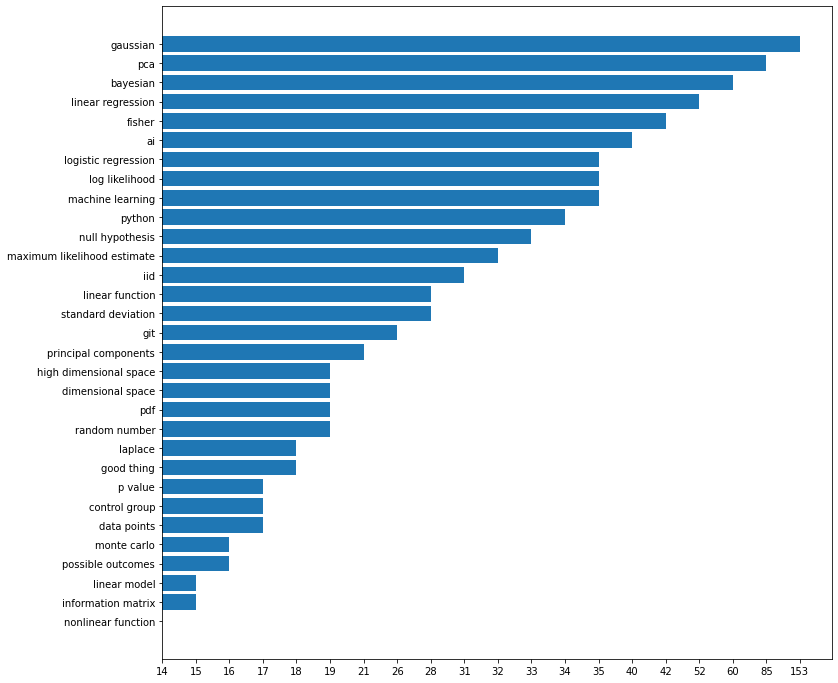

In [87]:
# Chart is super ugly, but this simple kind of visualisation could be nice for a overall overview
# If we decide to put such a plot in the paper we can make this plot pretty nice I think
plt.figure(figsize =(12, 12))
plt.barh(important_nouns[:,0], important_nouns[:,1])

Predicting the content of the exam:
* Over all frequency gives us insights which topics seem to be important over all lectures
    * For example Gaussian, Baysian are fundamentals of other topics, therefore they seem to be important for several topics and important to learn for the exam

* Problem: Some terms like linear or logistic regression, maximum likelihood estimator are topics of specific lectures
    * If the term logisitic regression gets mentioned extremly often in the logistic regression lecture, it does not mean that this lecture or topic is more important.
    * Reasons for this assumption:
        * not every lecture is held by mister Hennig. Different persons may have different styles of explaining and illustrating topics.
        * To explain a specific topic one word could occur very often. If this topic is not relevant itself, the high frequency of the word has no power in answering our question.
        

To get another prediction of exam topics, we need to find a structure of a probability across lectures. This could emphasize basic knowledge behind the topics.

Example if f.e. iid. would occur as a result, we would assume understanding iid and it's consequences to the data is crucial to understand the topics which are based on iid assumptions. 


In [103]:
lectures_dict = {}
for file in os.listdir("Transcribes"):
    lectures_dict[re.sub("\D", "", file)] = read_text_file(os.path.join("Transcribes", file))

In [110]:
def token_frequency(blob):
    freq = nltk.FreqDist(blob.noun_phrases)
    freq = sorted(freq.items(), key=lambda item: item[1])
    return freq

In [115]:
# logistic regression lecture
lec_7 = token_frequency(TextBlob(lectures_dict["07"]))
lec_7[-20:]

[('exponential family', 5),
 ('yeah', 6),
 ('omega zero', 6),
 ("ca n't", 6),
 ('maximum likelihood estimation', 6),
 ('bayesian', 6),
 ('positive number', 6),
 ('link function', 6),
 ('alright', 8),
 ('linear model', 8),
 ('well', 9),
 ('omega', 9),
 ('regression model', 10),
 ('nonlinear function', 10),
 ('log likelihood', 11),
 ('linear regression', 17),
 ('linear function', 19),
 ('logistic regression', 28),
 ('gaussian', 31),
 ('okay', 89)]

In [120]:
# linear regression lecture
lec_6 = token_frequency(TextBlob(lectures_dict["06"]))
lec_6[-20:]

[('regression problem', 4),
 ('different parameters', 4),
 ('input x', 5),
 ('parameters omega', 5),
 ('regression models', 5),
 ('linear function', 5),
 ('peter', 5),
 ('null hypothesis', 5),
 ('posterior distribution', 5),
 ('linear models', 6),
 ('linear model', 6),
 ('right', 7),
 ('well', 8),
 ('machine learning', 9),
 ('alright', 10),
 ('pca', 10),
 ('bayesian', 16),
 ('linear regression', 35),
 ('gaussian', 44),
 ('okay', 63)]